In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("2023-2024 NBA Player Stats - Regular.csv", encoding='ISO-8859-1', sep=';')


In [ ]:
print(df.head())
print(df.columns)


  Rk;Player;Pos;Age;Tm;G;GS;MP;FG;FGA;FG%;3P;3PA;3P%;2P;2PA;2P%;eFG%;FT;FTA;FT%;ORB;DRB;TRB;AST;STL;BLK;TOV;PF;PTS
0  1;Precious Achiuwa;PF-C;24;TOT;74;18;21.9;3.2;...                                                              
1  1;Precious Achiuwa;C;24;TOR;25;0;17.5;3.1;6.8;...                                                              
2  1;Precious Achiuwa;PF;24;NYK;49;18;24.2;3.2;6....                                                              
3  2;Bam Adebayo;C;26;MIA;71;71;34;7.5;14.3;0.521...                                                              
4  3;Ochai Agbaji;SG;23;TOT;78;28;21;2.3;5.6;0.41...                                                              
Index(['Rk;Player;Pos;Age;Tm;G;GS;MP;FG;FGA;FG%;3P;3PA;3P%;2P;2PA;2P%;eFG%;FT;FTA;FT%;ORB;DRB;TRB;AST;STL;BLK;TOV;PF;PTS'], dtype='object')


In [ ]:
fitur = ['PTS', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'FG%', '3P%', 'FT%']
target = 'Pos'


In [ ]:
print(df.columns.tolist())


['Rk;Player;Pos;Age;Tm;G;GS;MP;FG;FGA;FG%;3P;3PA;3P%;2P;2PA;2P%;eFG%;FT;FTA;FT%;ORB;DRB;TRB;AST;STL;BLK;TOV;PF;PTS']


In [ ]:
df = df.dropna(subset=fitur + [target])

X = df[fitur]
y = df[target]


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
def evaluasi_model(nama_model, model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"\n===== {nama_model} =====")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {nama_model}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


===== Random Forest =====
[[15  0  3  1  0  3  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 5  0 12  1  0  5  6  0]
 [ 0  0  0 29  0  1  8  0]
 [ 0  0  0  3  0  0  0  0]
 [ 0  0  6  0  0 10 10  0]
 [ 0  0  9  5  0  2 11  0]
 [ 0  0  0  0  0  0  1  0]]
              precision    recall  f1-score   support

           C       0.71      0.68      0.70        22
        C-PF       0.00      0.00      0.00         1
          PF       0.40      0.41      0.41        29
          PG       0.74      0.76      0.75        38
       PG-SG       0.00      0.00      0.00         3
          SF       0.48      0.38      0.43        26
          SG       0.31      0.41      0.35        27
       SG-PG       0.00      0.00      0.00         1

    accuracy                           0.52       147
   macro avg       0.33      0.33      0.33       147
weighted avg       0.52      0.52      0.52       147



c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


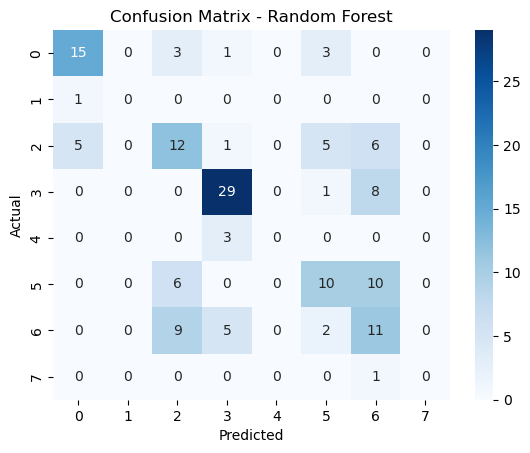

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
evaluasi_model("Random Forest", rf, X_test, y_test)


===== SVM =====
[[14  0  3  4  0  1  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 5  0  8  2  0  9  5  0]
 [ 0  0  0 24  0  2 12  0]
 [ 0  0  0  2  0  1  0  0]
 [ 0  0  4  1  0  9 12  0]
 [ 1  0  4  4  0  6 12  0]
 [ 0  0  0  0  0  0  1  0]]
              precision    recall  f1-score   support

           C       0.67      0.64      0.65        22
        C-PF       0.00      0.00      0.00         1
          PF       0.42      0.28      0.33        29
          PG       0.65      0.63      0.64        38
       PG-SG       0.00      0.00      0.00         3
          SF       0.32      0.35      0.33        26
          SG       0.29      0.44      0.35        27
       SG-PG       0.00      0.00      0.00         1

    accuracy                           0.46       147
   macro avg       0.29      0.29      0.29       147
weighted avg       0.46      0.46      0.45       147



c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


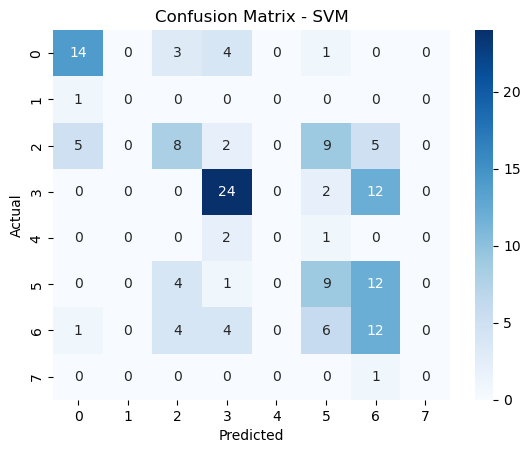

In [ ]:
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
evaluasi_model("SVM", svm, X_test, y_test)


===== k-NN =====
[[15  0  1  5  0  0  1  0]
 [ 1  0  0  0  0  0  0  0]
 [ 7  0  9  2  0  6  5  0]
 [ 1  0  2 21  0  4 10  0]
 [ 0  0  0  2  0  0  1  0]
 [ 1  0  7  4  0  7  7  0]
 [ 2  0  8  7  0  6  4  0]
 [ 0  0  0  0  0  0  1  0]]
              precision    recall  f1-score   support

           C       0.56      0.68      0.61        22
        C-PF       0.00      0.00      0.00         1
          PF       0.33      0.31      0.32        29
          PG       0.51      0.55      0.53        38
       PG-SG       0.00      0.00      0.00         3
          SF       0.30      0.27      0.29        26
          SG       0.14      0.15      0.14        27
       SG-PG       0.00      0.00      0.00         1

    accuracy                           0.38       147
   macro avg       0.23      0.25      0.24       147
weighted avg       0.36      0.38      0.37       147



c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


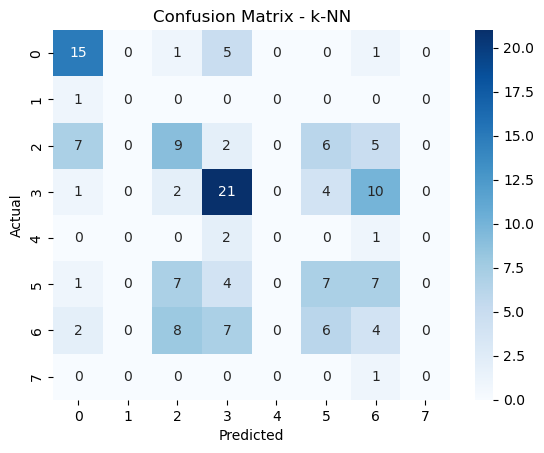

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
evaluasi_model("k-NN", knn, X_test, y_test)